# The Sparks Foundation Internship Program As Data Science & Business   Analytics 

Full Name: Muhammad Shoaib 


Email: shoaib00788@gmail.com

### Task 1: Prediction using Supervised ML
    
#### Problem : Predict the percentage of a student based on the no. of study hours.     

#### Dataset Variables

1: Hours: Number of hours studied by the student 

2: Scores: Number of score a student get        

#### Importing Requried Libraries


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set()
%matplotlib inline

#### Importing the Dataset from given Url

In [2]:
url =('http://bit.ly/w-data')

In [3]:
data =pd.read_csv(url)
S_data=data.copy()

#### Showing first 5 Rows 

In [4]:
S_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Data Exploration

In [5]:
S_data.shape

(25, 2)

As we are seeing we have 25 Rows and Two Colums ("Hours" & "Scores")

#### Checking Datatypes

In [6]:
S_data.dtypes

Hours     float64
Scores      int64
dtype: object

##### Now we Have to Summurize the dataset

In [7]:
S_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


As we can see Here .describe() function gives us summery of our dataset which shows 

- minimum value and maximum value 
- It also shows the skewness of our data as well 
- Here if we can see our mean value is greater than median so its Right skewed 



#### Checking Null Values in our dataset 

In [8]:
S_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

So we do not have null value in our dataset which is good 

### Data visualization

##### Regression plot

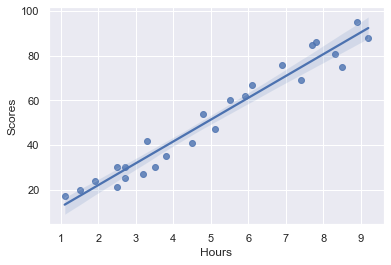

In [9]:
sns.regplot(x='Hours' , y='Scores', data=S_data)

From this Graph we can we that their is Linear relationship between two variable
- As we can also see the number of Hours increases so the Score is also Increases

#### Checking Correlation 

In [10]:
S_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- We can see that 0.97 is possitive it means if the number of hours increases so the score will also be increase

#### Checking Distribution

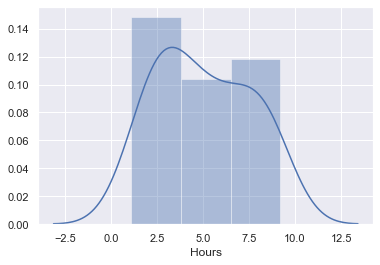

In [11]:
sns.distplot(S_data['Hours'])

-distplot() func shows that Variable 'Hours' are in Specific Range And there are no Outliers in dataset

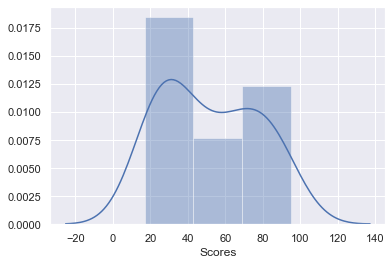

In [12]:
sns.distplot(S_data['Scores'])

-distplot() func shows that Variable 'Scores' are in Specific Range And there are no Outliers in dataset

## Choosing Model and Model Deployment 

### Splitting Variables into dependent and independent variables

In [13]:
X = S_data.drop(['Scores'], axis=1)
Y = S_data[['Scores']]
print(X.shape)
print(Y.shape)

(25, 1)
(25, 1)


### Using Train Test Split Fuction

In [14]:
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(17, 1) (17, 1)
(8, 1) (8, 1)


### Training Model and Testing Model 

#### - Here we are importing and using Linear Regression 

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- model.fit () func used to train the model here

In [17]:
pred=model.predict(xtest)

- model.predict () fucn used to predict model of xtest data 

In [18]:
pred

array([[34.00446614],
       [29.18811676],
       [21.48195776],
       [77.35161053],
       [49.41678414],
       [34.96773601],
       [27.26157701],
       [91.80065867]])

In [19]:
m = model.coef_
m

array([[9.63269875]])

In [20]:
c= model.intercept_
c

array([3.17983012])

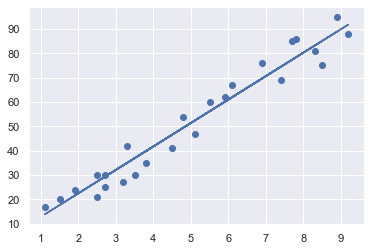

In [21]:
line= m*X+c
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

### Model Evaluation

#### Checking R2 Score 

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. After fitting a linear regression model, you need to determine how well the model fits the data

In [22]:
from sklearn.metrics import r2_score
test_r2=r2_score(ytest,pred)

In [23]:
train_r2=r2_score(ytrain,model.predict(xtrain))

In [24]:
print('R2 score for testing:',test_r2 )
print('R2 score for training:',train_r2 )

R2 score for testing: 0.9515586724822473
R2 score for training: 0.9515037021190215


- Since the R2 Score showing us the Training and testing score which is 0.95 which means its close to 1 so our linear model is performed very well here

### Question?

# What will be predicted score if a student studies for 9.25 hrs/ day?

### Answer

In [25]:
hour= 9.25 

new_pred= model.predict([[hour]])

In [26]:
print('if a student studies for {} hours in a day he will get {} % score in exam '.format(hour, new_pred))

if a student studies for 9.25 hours in a day he will get [[92.2822936]] % score in exam 
